In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/data for raml/Euler_type/raml_train_fea.xlsx')
data

,magnitude_1,magnitude_2,magnitude_3,magnitude_4,magnitude_5,magnitude_6,magnitude_7,magnitude_8,magnitude_9,phase_1,phase_2,phase_3,phase_4,phase_5,phase_6,phase_7,phase_8,phase_9
0,1.008509,0.970244,1.024461,1.020377,0.946489,1.138328,0.988603,0.928332,0.950598,-0.036172,0.049880,-0.013346,-0.010615,0.022613,-0.035708,0.019917,0.012278,0.0
1,1.013062,0.973301,1.026339,1.016674,0.948171,1.135541,0.982460,0.930408,0.937685,-0.038669,0.048166,-0.009197,-0.006857,0.026136,-0.035275,0.016688,0.007776,0.0
2,1.007639,0.970308,1.026577,1.011532,0.947387,1.137760,0.984271,0.939533,0.914930,-0.036675,0.051170,-0.008393,-0.011100,0.023999,-0.033495,0.014562,0.008318,0.0
3,1.010886,0.971849,1.027230,1.019173,0.948334,1.138058,0.982214,0.928265,0.863446,-0.035380,0.051640,-0.009789,-0.008607,0.024976,-0.040368,0.017178,0.009958,0.0
4,1.012456,0.971701,1.029814,1.022003,0.949451,1.138646,0.972981,0.930444,0.905443,-0.038424,0.049143,-0.010658,-0.007497,0.025617,-0.035031,0.016446,0.009620,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34170,1.059089,0.978241,1.075331,0.991154,0.959824,1.105883,0.884247,0.959739,0.764986,-0.026402,0.050255,-0.004623,0.005895,0.011371,-0.033685,0.021459,-0.016916,0.0
34171,1.064733,0.983616,1.084018,0.994713,0.971890,1.101676,0.868740,0.940654,0.965443,-0.036782,0.043170,-0.005331,0.003847,0.013237,-0.033825,0.024381,0.000813,0.0
34172,1.055633,0.975945,1.078061,0.997611,0.967306,1.114665,0.890453,0.935226,0.952207,-0.034823,0.048939,-0.008356,0.006063,0.007469,-0.035657,0.027409,-0.000953,0.0
34173,1.060772,0.983102,1.065535,0.999005,0.967453,1.106221,0.883779,0.946073,0.928207,-0.040776,0.047851,-0.005924,-0.006855,0.004257,-0.028924,0.033973,0.007002,0.0


In [4]:
X_train = data.iloc[:, :-1]
X_train = X_train.astype(float)
X_train

,magnitude_1,magnitude_2,magnitude_3,magnitude_4,magnitude_5,magnitude_6,magnitude_7,magnitude_8,magnitude_9,phase_1,phase_2,phase_3,phase_4,phase_5,phase_6,phase_7,phase_8
0,1.008509,0.970244,1.024461,1.020377,0.946489,1.138328,0.988603,0.928332,0.950598,-0.036172,0.049880,-0.013346,-0.010615,0.022613,-0.035708,0.019917,0.012278
1,1.013062,0.973301,1.026339,1.016674,0.948171,1.135541,0.982460,0.930408,0.937685,-0.038669,0.048166,-0.009197,-0.006857,0.026136,-0.035275,0.016688,0.007776
2,1.007639,0.970308,1.026577,1.011532,0.947387,1.137760,0.984271,0.939533,0.914930,-0.036675,0.051170,-0.008393,-0.011100,0.023999,-0.033495,0.014562,0.008318
3,1.010886,0.971849,1.027230,1.019173,0.948334,1.138058,0.982214,0.928265,0.863446,-0.035380,0.051640,-0.009789,-0.008607,0.024976,-0.040368,0.017178,0.009958
4,1.012456,0.971701,1.029814,1.022003,0.949451,1.138646,0.972981,0.930444,0.905443,-0.038424,0.049143,-0.010658,-0.007497,0.025617,-0.035031,0.016446,0.009620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34170,1.059089,0.978241,1.075331,0.991154,0.959824,1.105883,0.884247,0.959739,0.764986,-0.026402,0.050255,-0.004623,0.005895,0.011371,-0.033685,0.021459,-0.016916
34171,1.064733,0.983616,1.084018,0.994713,0.971890,1.101676,0.868740,0.940654,0.965443,-0.036782,0.043170,-0.005331,0.003847,0.013237,-0.033825,0.024381,0.000813
34172,1.055633,0.975945,1.078061,0.997611,0.967306,1.114665,0.890453,0.935226,0.952207,-0.034823,0.048939,-0.008356,0.006063,0.007469,-0.035657,0.027409,-0.000953
34173,1.060772,0.983102,1.065535,0.999005,0.967453,1.106221,0.883779,0.946073,0.928207,-0.040776,0.047851,-0.005924,-0.006855,0.004257,-0.028924,0.033973,0.007002


In [5]:
y_train = pd.read_excel('/content/drive/MyDrive/data for raml/Euler_type/raml_train_label.xlsx')
y_train

,label_cell_train
0,3.26
1,3.26
2,3.26
3,3.26
4,3.26
...,...
34170,24.92
34171,24.92
34172,24.92
34173,24.92


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (27340, 17)
y_train shape: (27340, 1)
X_val shape: (6835, 17)
y_val shape: (6835, 1)


In [7]:
data1 = pd.read_excel('/content/drive/MyDrive/data for raml/Euler_type/raml_val_fea.xlsx')
data1

,magnitude_1,magnitude_2,magnitude_3,magnitude_4,magnitude_5,magnitude_6,magnitude_7,magnitude_8,magnitude_9,phase_1,phase_2,phase_3,phase_4,phase_5,phase_6,phase_7,phase_8,phase_9
0,1.015711,0.972724,1.028721,1.021344,0.945010,1.132538,0.981477,0.926540,0.926972,-0.038618,0.049046,-0.005671,-0.005493,0.024757,-0.035255,0.011245,0.008881,0.0
1,1.008684,0.968104,1.028012,1.016519,0.949418,1.140471,0.982124,0.932997,0.883169,-0.036385,0.052934,-0.009384,-0.004736,0.022438,-0.039660,0.014923,0.009374,0.0
2,1.012132,0.975232,1.027009,1.022481,0.948479,1.134543,0.983083,0.918016,0.943540,-0.035349,0.050305,-0.009921,-0.007144,0.026459,-0.036961,0.015664,0.005690,0.0
3,1.005341,0.967665,1.024568,1.019163,0.947153,1.140464,0.985066,0.933111,0.857898,-0.037964,0.049403,-0.010739,-0.004426,0.029118,-0.037414,0.014493,0.006961,0.0
4,1.011962,0.971318,1.030586,1.014300,0.945664,1.142951,0.971310,0.934719,0.929501,-0.035031,0.051686,-0.009176,-0.008012,0.021137,-0.033681,0.015091,0.006667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,1.063702,0.984116,1.072274,0.989359,0.972247,1.109374,0.869495,0.945937,0.911502,-0.034411,0.055407,-0.008975,0.005447,0.009107,-0.035375,0.031645,-0.013180,0.0
8542,1.055655,0.977211,1.078133,0.993640,0.963980,1.109888,0.880837,0.952004,0.939371,-0.036616,0.058610,-0.009876,0.005846,0.006365,-0.023722,0.022462,-0.015889,0.0
8543,1.059784,0.986307,1.071502,0.998039,0.966636,1.110709,0.876539,0.941853,0.957028,-0.028015,0.052214,0.000321,0.004490,0.005825,-0.037493,0.022187,-0.012223,0.0
8544,1.064717,0.983890,1.076114,0.994657,0.964178,1.106658,0.871758,0.945698,0.941485,-0.030367,0.049230,-0.005167,-0.000035,0.002072,-0.027844,0.027546,-0.007284,0.0


In [8]:
X_test = data1.iloc[:, :-1]
X_test = X_test.astype(float)

X_test

,magnitude_1,magnitude_2,magnitude_3,magnitude_4,magnitude_5,magnitude_6,magnitude_7,magnitude_8,magnitude_9,phase_1,phase_2,phase_3,phase_4,phase_5,phase_6,phase_7,phase_8
0,1.015711,0.972724,1.028721,1.021344,0.945010,1.132538,0.981477,0.926540,0.926972,-0.038618,0.049046,-0.005671,-0.005493,0.024757,-0.035255,0.011245,0.008881
1,1.008684,0.968104,1.028012,1.016519,0.949418,1.140471,0.982124,0.932997,0.883169,-0.036385,0.052934,-0.009384,-0.004736,0.022438,-0.039660,0.014923,0.009374
2,1.012132,0.975232,1.027009,1.022481,0.948479,1.134543,0.983083,0.918016,0.943540,-0.035349,0.050305,-0.009921,-0.007144,0.026459,-0.036961,0.015664,0.005690
3,1.005341,0.967665,1.024568,1.019163,0.947153,1.140464,0.985066,0.933111,0.857898,-0.037964,0.049403,-0.010739,-0.004426,0.029118,-0.037414,0.014493,0.006961
4,1.011962,0.971318,1.030586,1.014300,0.945664,1.142951,0.971310,0.934719,0.929501,-0.035031,0.051686,-0.009176,-0.008012,0.021137,-0.033681,0.015091,0.006667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,1.063702,0.984116,1.072274,0.989359,0.972247,1.109374,0.869495,0.945937,0.911502,-0.034411,0.055407,-0.008975,0.005447,0.009107,-0.035375,0.031645,-0.013180
8542,1.055655,0.977211,1.078133,0.993640,0.963980,1.109888,0.880837,0.952004,0.939371,-0.036616,0.058610,-0.009876,0.005846,0.006365,-0.023722,0.022462,-0.015889
8543,1.059784,0.986307,1.071502,0.998039,0.966636,1.110709,0.876539,0.941853,0.957028,-0.028015,0.052214,0.000321,0.004490,0.005825,-0.037493,0.022187,-0.012223
8544,1.064717,0.983890,1.076114,0.994657,0.964178,1.106658,0.871758,0.945698,0.941485,-0.030367,0.049230,-0.005167,-0.000035,0.002072,-0.027844,0.027546,-0.007284


In [9]:
y_test = pd.read_excel('/content/drive/MyDrive/data for raml/Euler_type/raml_val_label.xlsx')
y_test

,label_cell_val
0,3.26
1,3.26
2,3.26
3,3.26
4,3.26
...,...
8541,24.92
8542,24.92
8543,24.92
8544,24.92


In [10]:
from tensorflow.keras.layers import concatenate

def inception_module(x, filters):
    # 1x1 convolution branch
    branch1x1 = Conv1D(filters[0], 1, activation='relu', padding='same')(x)

    # 3x3 convolution branch
    branch3x3 = Conv1D(filters[1], 1, activation='relu', padding='same')(x)
    branch3x3 = Conv1D(filters[2], 3, activation='relu', padding='same')(branch3x3)

    # 5x5 convolution branch
    branch5x5 = Conv1D(filters[3], 1, activation='relu', padding='same')(x)
    branch5x5 = Conv1D(filters[4], 5, activation='relu', padding='same')(branch5x5)

    # Concatenate branches
    x = concatenate([branch1x1, branch3x3, branch5x5], axis=-1)

    return x

In [11]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Concatenate, Flatten, Dense

def inception_net_classification(input_shape):       ## Inception-like model

    inputs = Input(input_shape)

    inception = inception_module(inputs, [128, 96, 128, 96, 128])

    # Convolutional block 2
    conv2_1 = Conv1D(64, 1, activation='relu', padding='same')(inception)
    conv2_2 = Conv1D(128, 3, activation='relu', padding='same')(conv2_1)
    conv2_3 = Conv1D(256, 5, activation='relu', padding='same')(conv2_2)

    # Convolutional block 3
    conv3_1 = Conv1D(64, 1, activation='relu', padding='same')(conv2_3)
    conv3_2 = Conv1D(128, 1, activation='relu', padding='same')(conv3_1)
    conv3_3 = Conv1D(256, 1, activation='relu', padding='same')(conv3_2)

    # Flatten
    flatten = Flatten()(conv3_3)

    # Dense layers
    dense1 = Dense(256, activation='relu')(flatten)
    dense2 = Dense(128, activation='relu')(dense1)

    # Output layer
    output = Dense(1, activation='linear')(dense2)

    # Create model
    model = Model(inputs=inputs, outputs=output)

    return model

In [15]:
def custom_loss(y_true, y_pred):
    mae_loss = tf.keras.losses.mean_absolute_error(y_true, y_pred)
    mse_loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
    total_loss = mae_loss + mse_loss
    return total_loss

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

reg_model = inception_net_classification(input_shape=(17, 1))

learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

In [16]:
reg_model.compile(loss=custom_loss, optimizer= optimizer, metrics=['mae', 'mse'])

In [17]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

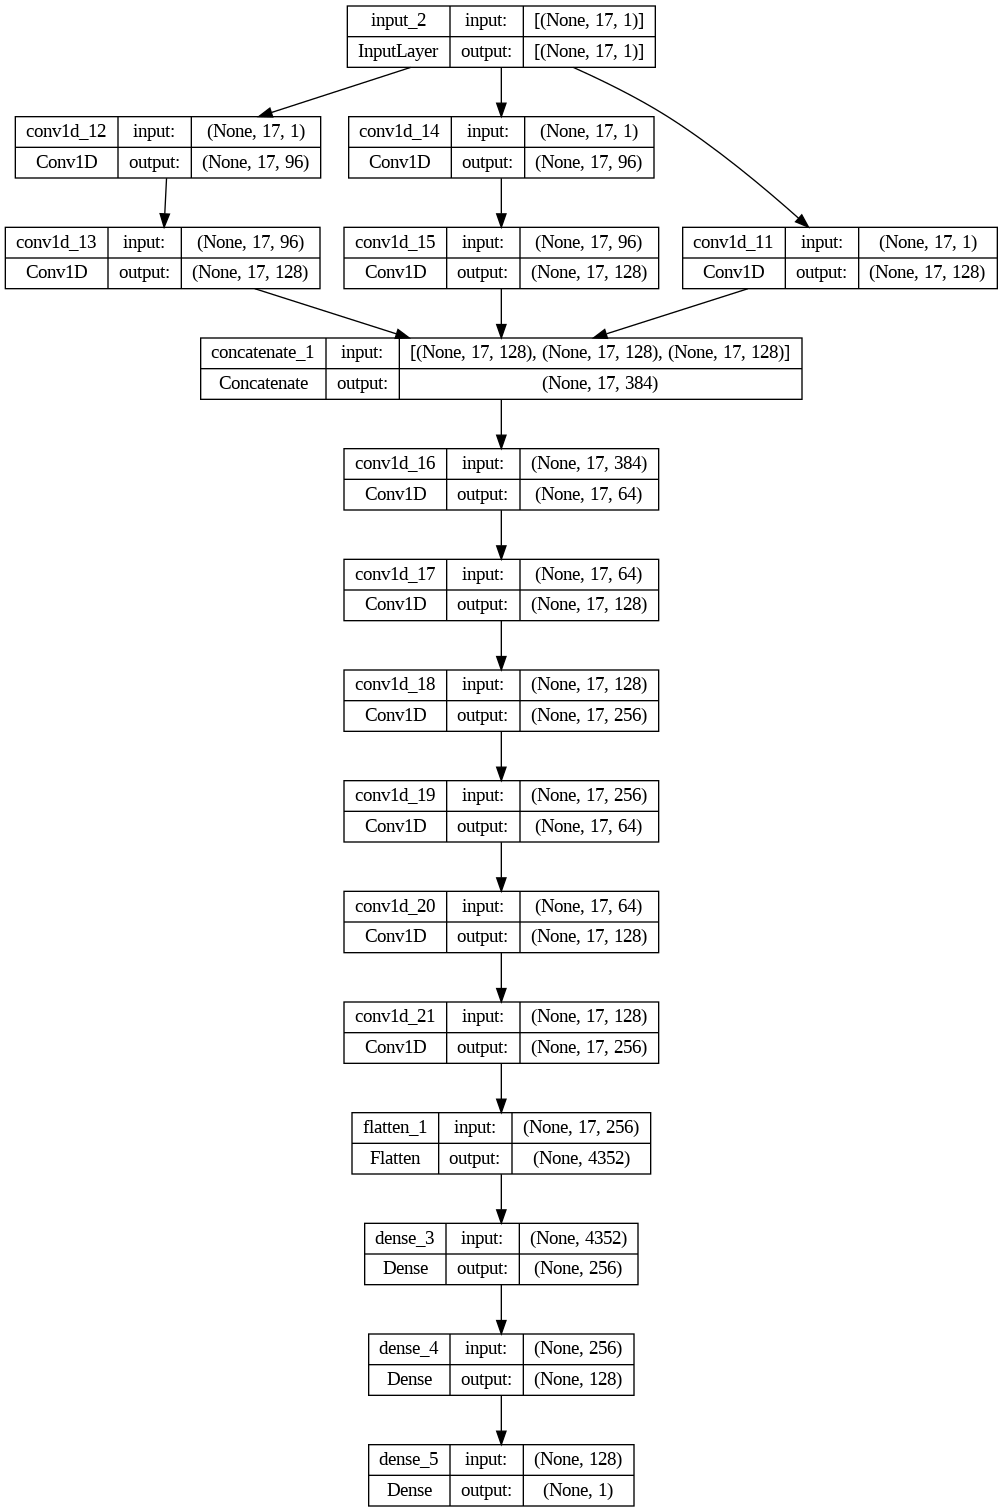

In [18]:
from tensorflow.keras.utils import plot_model

# Build your model
model = inception_net_classification((17,1))  # assuming your input vectors have a dimension of 17

# Generate the plot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [17]:
reg_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/50
855/855 [==============================] - 31s 15ms/step - loss: 31.5387 - mae: 4.0145 - mse: 27.5242 - val_loss: 10.3451 - val_mae: 2.0305 - val_mse: 8.3146
Epoch 2/50
855/855 [==============================] - 9s 10ms/step - loss: 9.3485 - mae: 1.9223 - mse: 7.4261 - val_loss: 7.9918 - val_mae: 1.7820 - val_mse: 6.2097
Epoch 3/50
855/855 [==============================] - 9s 10ms/step - loss: 8.0562 - mae: 1.7645 - mse: 6.2917 - val_loss: 6.4705 - val_mae: 1.5282 - val_mse: 4.9424
Epoch 4/50
855/855 [==============================] - 9s 11ms/step - loss: 6.8562 - mae: 1.5891 - mse: 5.2671 - val_loss: 5.1256 - val_mae: 1.2674 - val_mse: 3.8582
Epoch 5/50
855/855 [==============================] - 8s 9ms/step - loss: 5.5192 - mae: 1.3633 - mse: 4.1559 - val_loss: 4.6599 - val_mae: 1.2507 - val_mse: 3.4092
Epoch 6/50
855/855 [==============================] - 9s 10ms/step - loss: 5.1424 - mae: 1.2952 - mse: 3.8472 - val_loss: 5.2142 - val_mae: 1.2779 - val_mse: 3.9363
Epoch 7

In [18]:
reg_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 17, 1)]      0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 17, 96)       192         ['input_1[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 17, 96)       192         ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 17, 128)      256         ['input_1[0][0]']                
                                                                                              

In [19]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the best model
custom_objects = {'custom_loss': custom_loss}
with tf.keras.utils.custom_object_scope(custom_objects):
    # Load the best model
    best_model = load_model('best_model.h5')

# Evaluate on test data
test_results = best_model.evaluate(X_test, y_test)

# Extract MAE and MSE from the test results
test_mae = test_results[1]
test_mse = test_results[2]

print("Test MAE:", test_mae)
print("Test MSE:", test_mse)


268/268 [==============================] - 2s 7ms/step - loss: 3.3338 - mae: 0.9550 - mse: 2.3788
Test MAE: 0.9549569487571716
Test MSE: 2.378804922103882
